# Import Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# create path
path = r'/Users/mimielaurant/Documents/Career Foundry/Immersion_Achievement 6/Citibike Project'

In [3]:
# import file
data = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'citibikes_new.csv'), index_col = False)

In [4]:
data.head()

,Unnamed: 0,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,...,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,age,Trip Range,trip_minutes
0,0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,...,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968-01-01,2,45.692282,long trip,16
1,1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,...,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983-01-01,1,30.699541,average trip,9
2,2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,...,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989-01-01,1,24.714600,average trip,6
3,3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,...,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988-01-01,2,25.743160,average trip,9
4,4,VGBsb5,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,...,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,1978-01-01,0,35.685211,long trip,38


In [5]:
# drop unnamed column
data = data.drop(columns = ['Unnamed: 0'])

In [6]:
data.columns

Index(['trip_id', 'bike_id', 'weekday', 'start_hour', 'start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender', 'age',
       'Trip Range', 'trip_minutes'],
      dtype='object')

In [7]:
data.shape

(49977, 21)

# Most popular dates for rentals

In [8]:
# sort rentals by weekday
data.groupby('weekday')['trip_id'].count()

weekday
Fri    7308
Mon    7712
Sat    6507
Sun    7315
Thu    6849
Tue    7062
Wed    7224
Name: trip_id, dtype: int64

In [9]:
trip_counts = data.groupby('weekday')['trip_id'].count().sort_values()

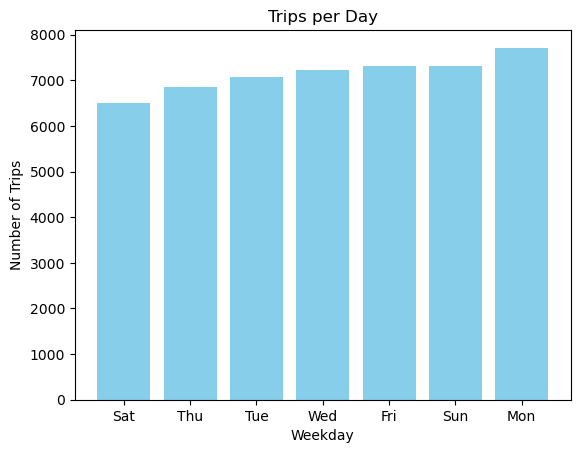

In [10]:
# Create a bar chart
plt.bar(trip_counts.index, trip_counts.values, color='skyblue')

# Customize the chart
plt.title('Trips per Day')
plt.xlabel('Weekday')
plt.ylabel('Number of Trips')

# Save the chart to an image file (e.g., PNG)
plt.savefig('Trips_per_Day.png')

# Show the chart
plt.show()

# Most popular times of day for rentals

In [11]:
# sort rentals by hour
hour_counts = data.groupby('start_hour')['trip_id'].count().sort_values()

In [12]:
hour_counts

start_hour
4       89
3      120
2      194
5      208
1      330
0      522
6      911
23     932
22    1323
21    1536
7     2037
10    2166
20    2207
11    2272
9     2811
12    2899
13    2978
14    3002
15    3129
8     3283
19    3302
16    3790
18    4869
17    5067
Name: trip_id, dtype: int64

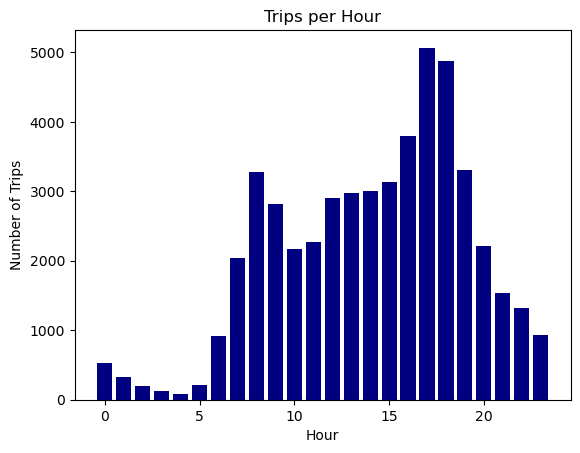

In [13]:
# Create a bar chart
plt.bar(hour_counts.index, hour_counts.values, color='navy')

# Customize the chart
plt.title('Trips per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')

# Save the chart to an image file (e.g., PNG)
plt.savefig('Trips_per_Hour.png')

# Show the chart
plt.show()

# Trips by day and time

In [8]:
# sort rentals by weekday and time
grouped_data = data.groupby(['weekday', 'start_hour'])['trip_id'].count().reset_index()

In [9]:
grouped_data

,weekday,start_hour,trip_id
0,Fri,0,56
1,Fri,1,38
2,Fri,2,27
3,Fri,3,13
4,Fri,4,10
...,...,...,...
163,Wed,19,523
164,Wed,20,333
165,Wed,21,228
166,Wed,22,211


In [10]:
grouped_data = grouped_data.sort_values(by='trip_id', ascending=False)

In [11]:
# export 
grouped_data.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'timeslots.csv'))

In [17]:
# sort data to find the 20 most popular times that bikes are rented
top_20_timeslots = grouped_data.head(20)
print(top_20_timeslots)

    weekday  start_hour  trip_id
42      Mon          18      849
41      Mon          17      821
17      Fri          17      799
162     Wed          18      779
137     Tue          17      761
138     Tue          18      755
114     Thu          18      746
161     Wed          17      742
113     Thu          17      734
87      Sun          15      672
88      Sun          16      671
152     Wed           8      652
18      Fri          18      645
89      Sun          17      644
128     Tue           8      641
104     Thu           8      636
86      Sun          14      630
85      Sun          13      620
84      Sun          12      604
63      Sat          15      599


In [18]:
# export 
top_20_timeslots.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'top_timeslots.csv'))

# Categorizing trips by time of day

In [19]:
# define times of day groupings
def parts_of_day(row):
    if row ['start_hour'] <= 4:
        return 'late-night ride'
    if (row ['start_hour'] > 4) and (row['start_hour'] <= 8):
        return 'early-morning ride'
    if (row ['start_hour'] > 8) and (row['start_hour'] <= 11):
        return 'late_morning ride'
    if (row ['start_hour'] > 11) and (row ['start_hour'] <= 14):
        return 'early_afternoon ride'
    if (row ['start_hour'] > 14) and (row ['start_hour'] <= 16):
        return 'late_afternoon ride'
    if (row ['start_hour'] > 16) and (row ['start_hour'] <= 18):
        return 'early_evening ride'
    if (row ['start_hour'] > 18) and (row ['start_hour'] <= 20):
        return 'late-evening ride'
    else: return 'night ride'


In [20]:
data['trip_type'] = data.apply(parts_of_day, axis=1)

In [21]:
data.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,...,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,age,Trip Range,trip_minutes,trip_type
0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,...,40.742388,-73.997262,993,Subscriber,1968-01-01,2,45.692282,long trip,16,early_evening ride
1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,...,40.728419,-73.987140,581,Subscriber,1983-01-01,1,30.699541,average trip,9,early_evening ride
2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,...,40.768254,-73.988639,361,Subscriber,1989-01-01,1,24.714600,average trip,6,late-evening ride
3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,...,40.756014,-73.967416,561,Subscriber,1988-01-01,2,25.743160,average trip,9,late_morning ride
4,VGBsb5,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,...,40.743943,-73.979661,2296,Non-Subscriber,1978-01-01,0,35.685211,long trip,38,early_evening ride


In [22]:
# sort rentals by trip type
category_counts = data.groupby('trip_type')['trip_id'].count()

In [23]:
category_counts

trip_type
early-morning ride      6439
early_afternoon ride    8879
early_evening ride      9936
late-evening ride       5509
late-night ride         1255
late_afternoon ride     6919
late_morning ride       7249
night ride              3791
Name: trip_id, dtype: int64

In [ ]:
# export 
data.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'citibike_fresh.csv'))

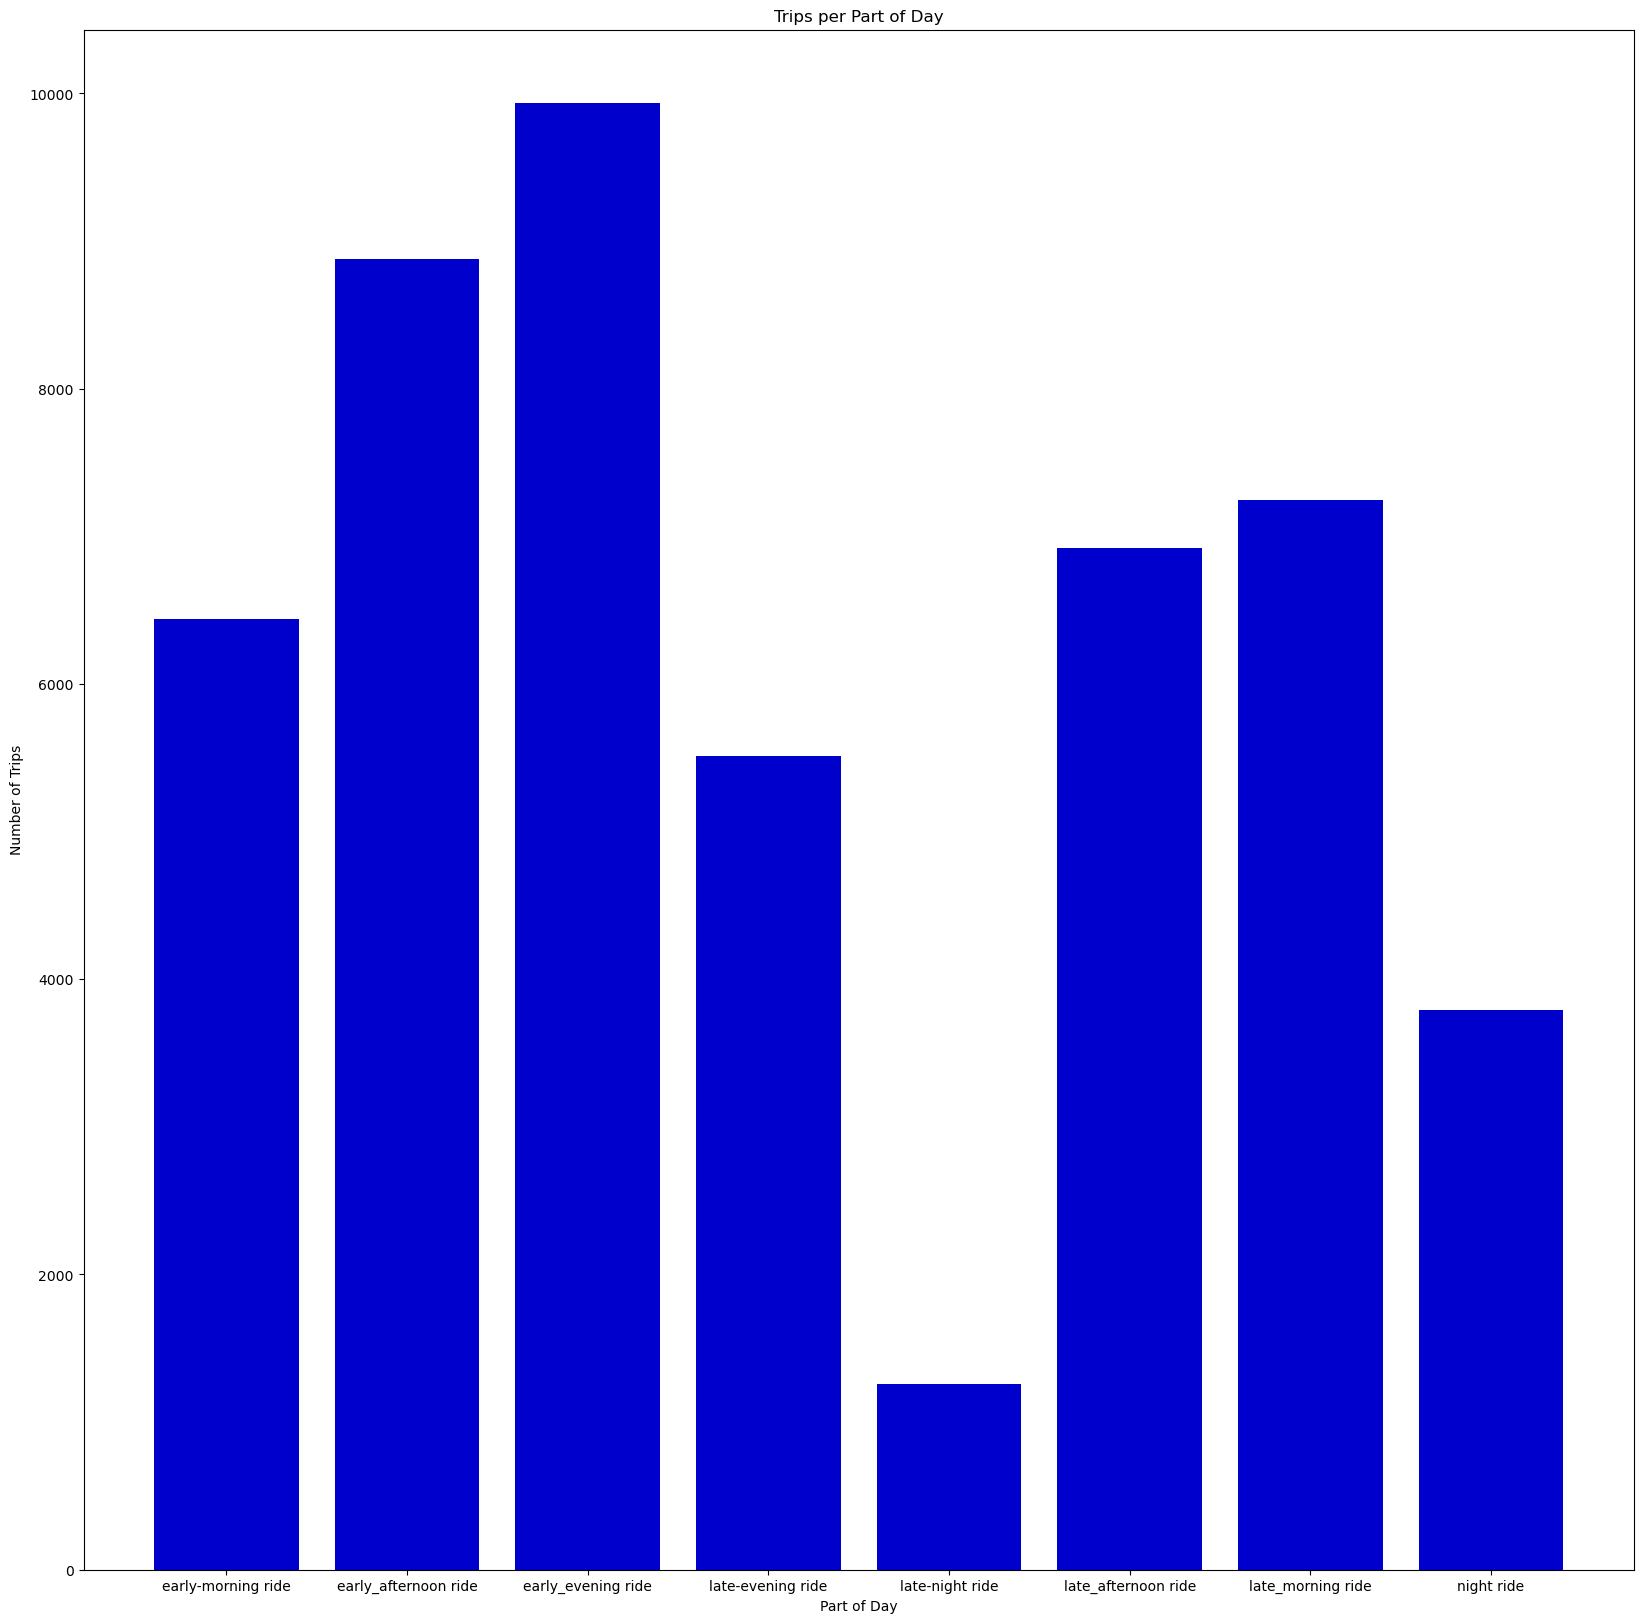

In [24]:
# Set the figure size to make the total area wider
plt.figure(figsize=(20, 20))  # Adjust width and height as needed

# Create a bar chart
plt.bar(category_counts.index, category_counts.values, color='mediumblue')

# Customize the chart
plt.title('Trips per Part of Day')
plt.xlabel('Part of Day')
plt.ylabel('Number of Trips')

# Save the chart to an image file (e.g., PNG)
plt.savefig('Trips_per_Part_of_Day.png')

# Show the chart
plt.show()

# Most/Least Popular Rental Stations

In [25]:
# import stations data
stations = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'citibike_stations.csv'), index_col = False)

In [26]:
stations.head()

,stationid,neighborhood,borough,zipcode,station_name,latitude,longitude,count
0,523,Manhattan Community Board 5,Manhattan,10018.0,W 38 St & 8 Ave,40.754666,-73.991382,228
1,257,Manhattan Community Board 1,Manhattan,10013.0,Lispenard St & Broadway,40.719392,-74.002472,118
2,479,Clinton,Manhattan,10019.0,9 Ave & W 45 St,40.760193,-73.991255,226
3,527,Kips Bay,Manhattan,10016.0,E 33 St & 1 Ave,40.743156,-73.974347,207
4,521,Manhattan Community Board 4,Manhattan,10122.0,8 Ave & W 31 St,40.750450,-73.994811,410


In [27]:
stations.shape

(330, 8)

In [28]:
# sort to find the top 30 stations
stations2 = stations.sort_values(by='count', ascending=False)
print(stations2)

     stationid                 neighborhood    borough  zipcode  \
177        459  Manhattan Community Board 4  Manhattan  10011.0   
5          293  Manhattan Community Board 2  Manhattan  10003.0   
58         519  Manhattan Community Board 5  Manhattan  10037.0   
239        497  Manhattan Community Board 5  Manhattan  10010.0   
42         426  Manhattan Community Board 1  Manhattan  10282.0   
..         ...                          ...        ...      ...   
324        119                          NaN   Brooklyn  11251.0   
329        321                        Dumbo   Brooklyn  11201.0   
93         372                 Clinton Hill   Brooklyn  11225.0   
323       2005                          NaN   Brooklyn  11251.0   
328       2001                          NaN   Brooklyn  11251.0   

                      station_name   latitude  longitude  count  
177               W 20 St & 11 Ave  40.746745 -74.007756    536  
5            Lafayette St & E 8 St  40.730287 -73.990765    505

In [29]:
top_30 = stations2.head(30)
print(top_30)

     stationid                 neighborhood    borough  zipcode  \
177        459  Manhattan Community Board 4  Manhattan  10011.0   
5          293  Manhattan Community Board 2  Manhattan  10003.0   
58         519  Manhattan Community Board 5  Manhattan  10037.0   
239        497  Manhattan Community Board 5  Manhattan  10010.0   
42         426  Manhattan Community Board 1  Manhattan  10282.0   
4          521  Manhattan Community Board 4  Manhattan  10122.0   
208        382  Manhattan Community Board 2  Manhattan  10003.0   
92         285  Manhattan Community Board 2  Manhattan  10003.0   
6          380  Manhattan Community Board 2  Manhattan  10014.0   
122        477  Manhattan Community Board 5  Manhattan  10036.0   
199        499  Manhattan Community Board 7  Manhattan  10463.0   
164        284  Manhattan Community Board 2  Manhattan  10014.0   
115        435  Manhattan Community Board 4  Manhattan  10011.0   
168        151  Manhattan Community Board 2  Manhattan  10012.

In [ ]:
# export 
top_30.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'top_30_stations.csv'))

In [30]:
# sort to find the bottom 30 stations
stations3 = stations.sort_values(by='count', ascending=True)
print(stations3)

     stationid                 neighborhood    borough  zipcode  \
328       2001                          NaN   Brooklyn  11251.0   
323       2005                          NaN   Brooklyn  11251.0   
93         372                 Clinton Hill   Brooklyn  11225.0   
329        321                        Dumbo   Brooklyn  11201.0   
324        119                          NaN   Brooklyn  11251.0   
..         ...                          ...        ...      ...   
42         426  Manhattan Community Board 1  Manhattan  10282.0   
239        497  Manhattan Community Board 5  Manhattan  10010.0   
58         519  Manhattan Community Board 5  Manhattan  10037.0   
5          293  Manhattan Community Board 2  Manhattan  10003.0   
177        459  Manhattan Community Board 4  Manhattan  10011.0   

                      station_name   latitude  longitude  count  
328            7 Ave & Farragut St  40.698921 -73.973330      5  
323         Railroad Ave & Kay Ave  40.705312 -73.971001      5

In [31]:
bottom_30 = stations3.head(30)
print(bottom_30)

     stationid                 neighborhood    borough  zipcode  \
328       2001                          NaN   Brooklyn  11251.0   
323       2005                          NaN   Brooklyn  11251.0   
93         372                 Clinton Hill   Brooklyn  11225.0   
329        321                        Dumbo   Brooklyn  11201.0   
324        119                          NaN   Brooklyn  11251.0   
317        421                          NaN   Brooklyn  11205.0   
325        431                          NaN   Brooklyn  11201.0   
266        298                          NaN   Brooklyn  11227.0   
307        436                          NaN   Brooklyn  11233.0   
131        343           Brooklyn Navy Yard   Brooklyn  11251.0   
327        443                          NaN   Brooklyn  11249.0   
310        289                 Clinton Hill   Brooklyn  11221.0   
43         275                          NaN   Brooklyn  11221.0   
322        409                 Clinton Hill   Brooklyn  11205.

In [ ]:
# export 
top_30.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'bottom_30_stations.csv'))

# Most Popular Destinations

In [ ]:
# import Nominatim API
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [ ]:
geolocator = Nominatim(user_agent="bikeshare")
reverse = RateLimiter(geolocator.reverse, min_delay_seconds=1, max_retries=0)

In [ ]:
# test
reverse("40.754666, -73.991382").raw['address']

In [ ]:
data['end_station_count'] = data.groupby('end_station_name')['end_station_name'].transform('count')

In [ ]:
# create end_stations dataframe 
end_stations = data[['end_station_id','end_station_name',\
'end_station_latitude','end_station_longitude', 'end_station_count']]\
.drop_duplicates(subset = ['end_station_id'])

In [ ]:
# rename columns and reset index
end_stations.columns=['stationid','station name','latitude','longitude', 'count']
end_stations.set_index('stationid', inplace=True)
end_stations

In [ ]:
# use API to get detailed location information for each statation
end_stations_2=[]
for index, row in end_stations.iterrows():
    end_stations_2.append(reverse("{}, {}".format(row['latitude'],\
    row['longitude'])).raw['address'])
pd.DataFrame(end_stations_2[:10])

In [ ]:
# create new stations dataframe
dfstations = pd.DataFrame(index=end_stations.index, data=end_stations_2,\
      columns=['neighbourhood','suburb','postcode'])
dfstations.rename(columns={"neighbourhood":"neighborhood",\
      "suburb": "borough", "postcode": "zipcode"}\
      ,inplace=True )

In [ ]:
# shorten zip codes and change data types
dfstations['neighborhood'] = dfstations['neighborhood'].astype('category')
dfstations['borough'] = dfstations['borough'].astype('category')
dfstations['zipcode'] = dfstations['zipcode'].str[:5].astype('category')
cols = ['neighborhood', 'borough']

In [ ]:
# add station name, count, latitude, and longitude to dataframe
dfstations[['station_name','latitude','longitude', 'count']] =\
 end_stations[['station name','latitude','longitude', 'count']]

In [ ]:
dfstations.head(10)

In [ ]:
# export data frame
dfstations.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'citibike_end_stations.csv'))

In [ ]:
# sort dfstations to find top 30 most popular destinations
dfstations2 = dfstations.sort_values(by='count', ascending=False)
print(dfstations2)

In [ ]:
popular_destinations = dfstations2.head(30)
print(popular_destinations)

In [ ]:
# export 
popular_destinations.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'pop_destinations.csv'))

# Most Popular Routes

In [32]:
# sort rentals by start and end stations
routes = data.groupby(['start_station_name', 'end_station_name'])['trip_id'].count().reset_index()

In [33]:
routes

,start_station_name,end_station_name,trip_id
0,1 Ave & E 15 St,1 Ave & E 15 St,3
1,1 Ave & E 15 St,1 Ave & E 18 St,2
2,1 Ave & E 15 St,1 Ave & E 30 St,5
3,1 Ave & E 15 St,1 Ave & E 44 St,1
4,1 Ave & E 15 St,2 Ave & E 31 St,4
...,...,...,...
27653,York St & Jay St,Washington Park,1
27654,York St & Jay St,Willoughby Ave & Hall St,1
27655,York St & Jay St,Willoughby Ave & Walworth St,1
27656,York St & Jay St,Wythe Ave & Metropolitan Ave,1


In [34]:
routes = routes.sort_values(by='trip_id', ascending=False)

In [35]:
routes

,start_station_name,end_station_name,trip_id
5886,Central Park S & 6 Ave,Central Park S & 6 Ave,77
14060,Grand Army Plaza & Central Park S,Grand Army Plaza & Central Park S,31
5399,Broadway & W 60 St,Broadway & W 60 St,30
14024,Grand Army Plaza & Central Park S,Broadway & W 60 St,25
26819,Washington Square E,University Pl & E 14 St,23
...,...,...,...
15954,Lafayette St & Jersey St,W 53 St & 10 Ave,1
15955,Lafayette St & Jersey St,W 56 St & 6 Ave,1
15956,Lafayette St & Jersey St,W Broadway & Spring St,1
15957,Lafayette St & Jersey St,Washington Pl & Broadway,1


In [36]:
# Filter rows where 'trip_id' is greater than 1
filtered_routes = routes[routes['trip_id'] > 1]

# Display the filtered DataFrame
print(filtered_routes)

                      start_station_name                   end_station_name  \
5886              Central Park S & 6 Ave             Central Park S & 6 Ave   
14060  Grand Army Plaza & Central Park S  Grand Army Plaza & Central Park S   
5399                  Broadway & W 60 St                 Broadway & W 60 St   
14024  Grand Army Plaza & Central Park S                 Broadway & W 60 St   
26819                Washington Square E            University Pl & E 14 St   
...                                  ...                                ...   
5180                  Broadway & W 55 St                    E 39 St & 3 Ave   
5110                  Broadway & W 53 St                   W 26 St & 10 Ave   
5183                  Broadway & W 55 St                    E 45 St & 3 Ave   
4472                  Broadway & W 36 St                E 16 St & Irving Pl   
5291                  Broadway & W 58 St                    E 45 St & 3 Ave   

       trip_id  
5886        77  
14060       31  


In [37]:
# top 100 routes
popular_routes = filtered_routes.head(100)
print(popular_routes)

                      start_station_name                   end_station_name  \
5886              Central Park S & 6 Ave             Central Park S & 6 Ave   
14060  Grand Army Plaza & Central Park S  Grand Army Plaza & Central Park S   
5399                  Broadway & W 60 St                 Broadway & W 60 St   
14024  Grand Army Plaza & Central Park S                 Broadway & W 60 St   
26819                Washington Square E            University Pl & E 14 St   
...                                  ...                                ...   
27145              West St & Chambers St              Barrow St & Hudson St   
14621          Greenwich St & N Moore St           Greenwich St & Warren St   
18420                  Pershing Square N               E 30 St & Park Ave S   
15174              Howard St & Centre St           Vesey Pl & River Terrace   
26974      Washington St & Gansevoort St              West St & Chambers St   

       trip_id  
5886        77  
14060       31  


In [ ]:
# export 
popular_destinations.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'pop_routes.csv'))

# Average trip duration in minutes

In [38]:
# Calculate the average of the 'trip_minutes' column
average_trip_minutes = data['trip_minutes'].mean()
# Display the result
print(f"Average Trip Minutes: {average_trip_minutes}")

Average Trip Minutes: 13.480821177741761


# Subscriber vs. Casual Riders

In [39]:
# sort rentals by subscriber type
customer_counts = data.groupby('subscriber')['trip_id'].count().sort_values()

In [40]:
customer_counts

subscriber
Non-Subscriber     6979
Subscriber        42998
Name: trip_id, dtype: int64

# Rider Ages

In [41]:
# import file
data = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'citibike_fresh.csv'), index_col = False)

In [42]:
data.head()

,Unnamed: 0,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,...,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,age,Trip Range,trip_minutes,trip_type
0,0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,...,40.742388,-73.997262,993,Subscriber,1968-01-01,2,45.692282,long trip,16,early_evening ride
1,1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,...,40.728419,-73.987140,581,Subscriber,1983-01-01,1,30.699541,average trip,9,early_evening ride
2,2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,...,40.768254,-73.988639,361,Subscriber,1989-01-01,1,24.714600,average trip,6,late-evening ride
3,3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,...,40.756014,-73.967416,561,Subscriber,1988-01-01,2,25.743160,average trip,9,late_morning ride
4,4,VGBsb5,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,...,40.743943,-73.979661,2296,Non-Subscriber,1978-01-01,0,35.685211,long trip,38,early_evening ride


In [43]:
# Round the 'age' column to the nearest whole number
data['age'] = data['age'].round()

In [44]:
# sort rentals by age
age_counts = data.groupby('age')['trip_id'].count().sort_values()

In [45]:
age_counts

age
97.0       1
90.0       1
88.0       1
85.0       1
93.0       1
        ... 
30.0    1798
32.0    1810
33.0    1830
29.0    1837
36.0    8363
Name: trip_id, Length: 72, dtype: int64

In [46]:
# define times of age groupings
def age_categories(row):
    if row ['age'] <= 18:
        return 'child'
    if (row ['age'] > 18) and (row['age'] <= 25):
        return 'young adult'
    if (row ['age'] > 25) and (row['age'] <= 45):
        return 'adult'
    if (row ['age'] > 45) and (row ['age'] <= 65):
        return 'middle-aged'
    else: return 'elder'

In [47]:
data['age_group'] = data.apply(age_categories, axis=1)

In [48]:
data.head()

,Unnamed: 0,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,...,end_station_longitude,trip_duration,subscriber,birth_year,gender,age,Trip Range,trip_minutes,trip_type,age_group
0,0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,...,-73.997262,993,Subscriber,1968-01-01,2,46.0,long trip,16,early_evening ride,middle-aged
1,1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,...,-73.987140,581,Subscriber,1983-01-01,1,31.0,average trip,9,early_evening ride,adult
2,2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,...,-73.988639,361,Subscriber,1989-01-01,1,25.0,average trip,6,late-evening ride,young adult
3,3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,...,-73.967416,561,Subscriber,1988-01-01,2,26.0,average trip,9,late_morning ride,adult
4,4,VGBsb5,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,...,-73.979661,2296,Non-Subscriber,1978-01-01,0,36.0,long trip,38,early_evening ride,adult


In [49]:
# sort rentals by age group
age_groups = data.groupby('age_group')['trip_id'].count()

In [50]:
age_groups

age_group
adult          35446
child             93
elder            576
middle-aged    10215
young adult     3647
Name: trip_id, dtype: int64

In [ ]:
# export 
data.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'citibikes_fresh.csv'))

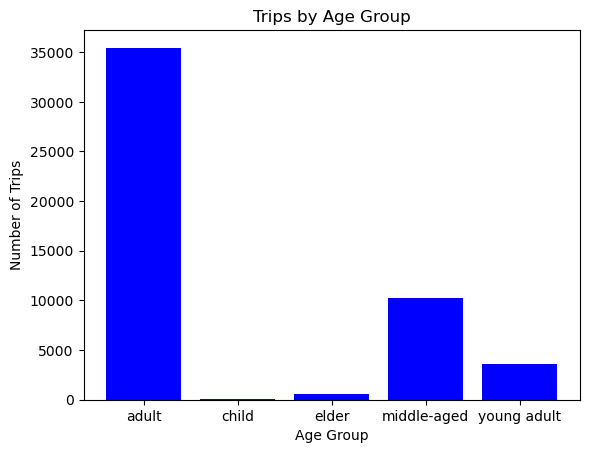

In [51]:
# Create a bar chart
plt.bar(age_groups.index, age_groups.values, color='blue')

# Customize the chart
plt.title('Trips by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Trips')

# Save the chart to an image file (e.g., PNG)
plt.savefig('Trips_by_Age_Group.png')

# Show the chart
plt.show()